In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train = pd.read_csv('train.csv')
train.head()

C:\Users\Akshay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [66]:
train.isnull().sum()

appno                  0
application            0
country.alpha2         0
country.name           0
decisiondate        8202
docname                0
doctypebranch          0
ecli                   0
introductiondate    8202
issue.0             6630
issue.1             7693
issue.10            8857
issue.11            8861
issue.12            8863
issue.13            8866
issue.14            8868
issue.15            8871
issue.16            8874
issue.17            8875
issue.18            8876
issue.19            8876
issue.2             8239
issue.20            8876
issue.21            8876
issue.22            8876
issue.23            8876
issue.24            8877
issue.25            8877
issue.26            8877
issue.3             8508
                    ... 
paragraphs=32-2        0
paragraphs=28-1        0
paragraphs=P6-2        0
paragraphs=46-4        0
ccl_article=1          0
ccl_article=10         0
ccl_article=11         0
ccl_article=12         0
ccl_article=13         0


In [67]:
train.shape

(8878, 328)

In [68]:
test = pd.read_csv('test.csv')
test.head()

C:\Users\Akshay\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [69]:
test.shape

(4760, 327)

In [70]:
test.isnull().sum()

appno                  0
application            0
country.alpha2         0
country.name           0
decisiondate        4401
docname                0
doctypebranch          0
ecli                   0
introductiondate    4400
issue.0             3532
issue.1             4087
issue.10            4752
issue.11            4752
issue.12            4754
issue.13            4756
issue.14            4756
issue.15            4756
issue.16            4757
issue.17            4758
issue.18            4758
issue.19            4758
issue.2             4402
issue.20            4758
issue.21            4759
issue.22            4759
issue.23            4759
issue.24            4760
issue.25            4760
issue.26            4760
issue.3             4553
                    ... 
paragraphs=29-1        0
paragraphs=32-2        0
paragraphs=28-1        0
paragraphs=P6-2        0
paragraphs=46-4        0
ccl_article=1          0
ccl_article=10         0
ccl_article=11         0
ccl_article=12         0


In [71]:
def fun_view():
    
    null_values = train.apply(lambda x:x.isnull().sum())
    
    blank_char = train.apply(lambda x:x.isin(['?']).sum())
    
    percent_blank_char = train.apply(lambda x:round((x.isin(['?']).sum()/train.shape[0])*100, 2))
    
    unique_values = train.apply(lambda x:len(x.unique()))
    
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)


Function Information None


,null_values,? Values,% ? Values,unique_values
appno,0,0,0.0,8799
application,0,0,0.0,1
country.alpha2,0,0,0.0,46
country.name,0,0,0.0,46
decisiondate,8202,0,0.0,233
docname,0,0,0.0,8682
doctypebranch,0,0,0.0,3
ecli,0,0,0.0,8878
introductiondate,8202,0,0.0,512
issue.0,6630,0,0.0,2062


In [72]:
df = pd.concat([train, test], ignore_index= True)
df.head()

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,applicability=,applicability=12,applicability=13,applicability=14,applicability=15,applicability=16,applicability=17,applicability=18,applicability=19,applicability=2,...,rank,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4,respondentOrderEng,separateopinion,sharepointid,typedescription
0,1,0,0,0,0,0,0,0,0,0,...,685.417419,RUS,NaN,NaN,NaN,NaN,38,False,349418,15
1,1,0,0,0,0,0,0,0,0,0,...,2641.901855,TUR,NaN,NaN,NaN,NaN,47,False,476616,15
2,1,0,0,0,0,0,0,0,0,0,...,942.213440,SVN,NaN,NaN,NaN,NaN,43,True,373194,15
3,1,0,0,0,0,0,0,0,0,0,...,1121.770142,CHE,NaN,NaN,NaN,NaN,46,True,392525,15
4,1,0,0,0,0,0,0,0,0,0,...,704.821594,RUS,NaN,NaN,NaN,NaN,38,False,423100,15


In [73]:
numerical_features = df.select_dtypes(exclude= 'object')
numerical_features.head()

,applicability=,applicability=12,applicability=13,applicability=14,applicability=15,applicability=16,applicability=17,applicability=18,applicability=19,applicability=2,...,paragraphs=P7-2,paragraphs=P7-3,paragraphs=P7-4,paragraphs=P7-4-1,paragraphs=P7-5,rank,respondentOrderEng,separateopinion,sharepointid,typedescription
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,685.417419,38,False,349418,15
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2641.901855,47,False,476616,15
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,942.213440,43,True,373194,15
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1121.770142,46,True,392525,15
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,704.821594,38,False,423100,15


In [74]:
numerical_features.columns

Index(['applicability=', 'applicability=12', 'applicability=13',
       'applicability=14', 'applicability=15', 'applicability=16',
       'applicability=17', 'applicability=18', 'applicability=19',
       'applicability=2',
       ...
       'paragraphs=P7-2', 'paragraphs=P7-3', 'paragraphs=P7-4',
       'paragraphs=P7-4-1', 'paragraphs=P7-5', 'rank', 'respondentOrderEng',
       'separateopinion', 'sharepointid', 'typedescription'],
      dtype='object', length=278)

In [75]:
categorical_variables = df.select_dtypes(include= 'object')
categorical_variables.columns

Index(['application', 'appno', 'country.alpha2', 'country.name',
       'decisiondate', 'docname', 'doctypebranch', 'ecli', 'introductiondate',
       'issue.0', 'issue.1', 'issue.10', 'issue.11', 'issue.12', 'issue.13',
       'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19',
       'issue.2', 'issue.20', 'issue.21', 'issue.22', 'issue.23', 'issue.24',
       'issue.25', 'issue.26', 'issue.3', 'issue.4', 'issue.5', 'issue.6',
       'issue.7', 'issue.8', 'issue.9', 'itemid', 'judgementdate', 'kpdate',
       'languageisocode', 'originatingbody_name', 'originatingbody_type',
       'parties.0', 'parties.1', 'parties.2', 'respondent.0', 'respondent.1',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')

In [76]:
for x in categorical_variables:
    
    categorical_variables[x].fillna('Missing', inplace = True)

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [77]:
categorical_variables.isnull().sum()

application             0
appno                   0
country.alpha2          0
country.name            0
decisiondate            0
docname                 0
doctypebranch           0
ecli                    0
introductiondate        0
issue.0                 0
issue.1                 0
issue.10                0
issue.11                0
issue.12                0
issue.13                0
issue.14                0
issue.15                0
issue.16                0
issue.17                0
issue.18                0
issue.19                0
issue.2                 0
issue.20                0
issue.21                0
issue.22                0
issue.23                0
issue.24                0
issue.25                0
issue.26                0
issue.3                 0
issue.4                 0
issue.5                 0
issue.6                 0
issue.7                 0
issue.8                 0
issue.9                 0
itemid                  0
judgementdate           0
kpdate      

In [78]:
for x in numerical_features:
    numerical_features[x].fillna(numerical_features[x].mean(), inplace = True)

In [79]:
numerical_features.isnull().sum()

applicability=        0
applicability=12      0
applicability=13      0
applicability=14      0
applicability=15      0
applicability=16      0
applicability=17      0
applicability=18      0
applicability=19      0
applicability=2       0
applicability=20      0
applicability=21      0
applicability=22      0
applicability=23      0
applicability=24      0
applicability=25      0
applicability=26      0
applicability=27      0
applicability=28      0
applicability=29      0
applicability=3       0
applicability=31      0
applicability=32      0
applicability=33      0
applicability=34      0
applicability=35      0
applicability=36      0
applicability=38      0
applicability=4       0
applicability=40      0
                     ..
paragraphs=9-2        0
paragraphs=P1-1       0
paragraphs=P1-1-1     0
paragraphs=P1-1-2     0
paragraphs=P1-2       0
paragraphs=P1-3       0
paragraphs=P1-4       0
paragraphs=P12-1      0
paragraphs=P13-1      0
paragraphs=P4-2       0
paragraphs=P4-2-

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
for x in categorical_variables:
    categorical_variables[x] = le.fit_transform(categorical_variables[x])

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
df1 = pd.concat([numerical_features, categorical_variables], axis = 1)
df1.head()

,applicability=,applicability=12,applicability=13,applicability=14,applicability=15,applicability=16,applicability=17,applicability=18,applicability=19,applicability=2,...,originatingbody_name,originatingbody_type,parties.0,parties.1,parties.2,respondent.0,respondent.1,respondent.2,respondent.3,respondent.4
0,1,0,0,0,0,0,0,0,0,0,...,1,0,5492,77,0,38,7,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,10,0,12340,103,0,44,7,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,3,0,2288,86,0,42,7,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,9,0,8208,93,0,8,7,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,421,77,0,38,7,1,0,0


In [83]:
df1.isnull().sum()

applicability=          0
applicability=12        0
applicability=13        0
applicability=14        0
applicability=15        0
applicability=16        0
applicability=17        0
applicability=18        0
applicability=19        0
applicability=2         0
applicability=20        0
applicability=21        0
applicability=22        0
applicability=23        0
applicability=24        0
applicability=25        0
applicability=26        0
applicability=27        0
applicability=28        0
applicability=29        0
applicability=3         0
applicability=31        0
applicability=32        0
applicability=33        0
applicability=34        0
applicability=35        0
applicability=36        0
applicability=38        0
applicability=4         0
applicability=40        0
                       ..
issue.19                0
issue.2                 0
issue.20                0
issue.21                0
issue.22                0
issue.23                0
issue.24                0
issue.25    

In [84]:
df1.shape

(13638, 328)

In [85]:
newtrain = df1.iloc[0:8878, :]
newtrain.shape

(8878, 328)

In [86]:
newtest = df1.iloc[8878: , :]
newtest = newtest.drop('importance', axis = 1)
newtest.shape

(4760, 327)

In [87]:
newtrain['importance'].value_counts()

4.0    5774
3.0    2011
1.0     582
2.0     511
Name: importance, dtype: int64

In [88]:
newtrain['importance'] = newtrain['importance'].astype(int)

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
newtrain = newtrain.drop('appno', axis = 1)
newtest = newtest.drop('appno', axis = 1)

In [98]:
x = newtrain.drop('importance', axis = 1)
y = newtrain['importance']

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [100]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score, classification_report

In [102]:
print(accuracy_score(y_test, y_pred))

0.8941441441441441


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.71      0.73       116
           2       0.71      0.42      0.53       112
           3       0.79      0.84      0.81       421
           4       0.96      0.98      0.97      1127

    accuracy                           0.89      1776
   macro avg       0.80      0.74      0.76      1776
weighted avg       0.89      0.89      0.89      1776



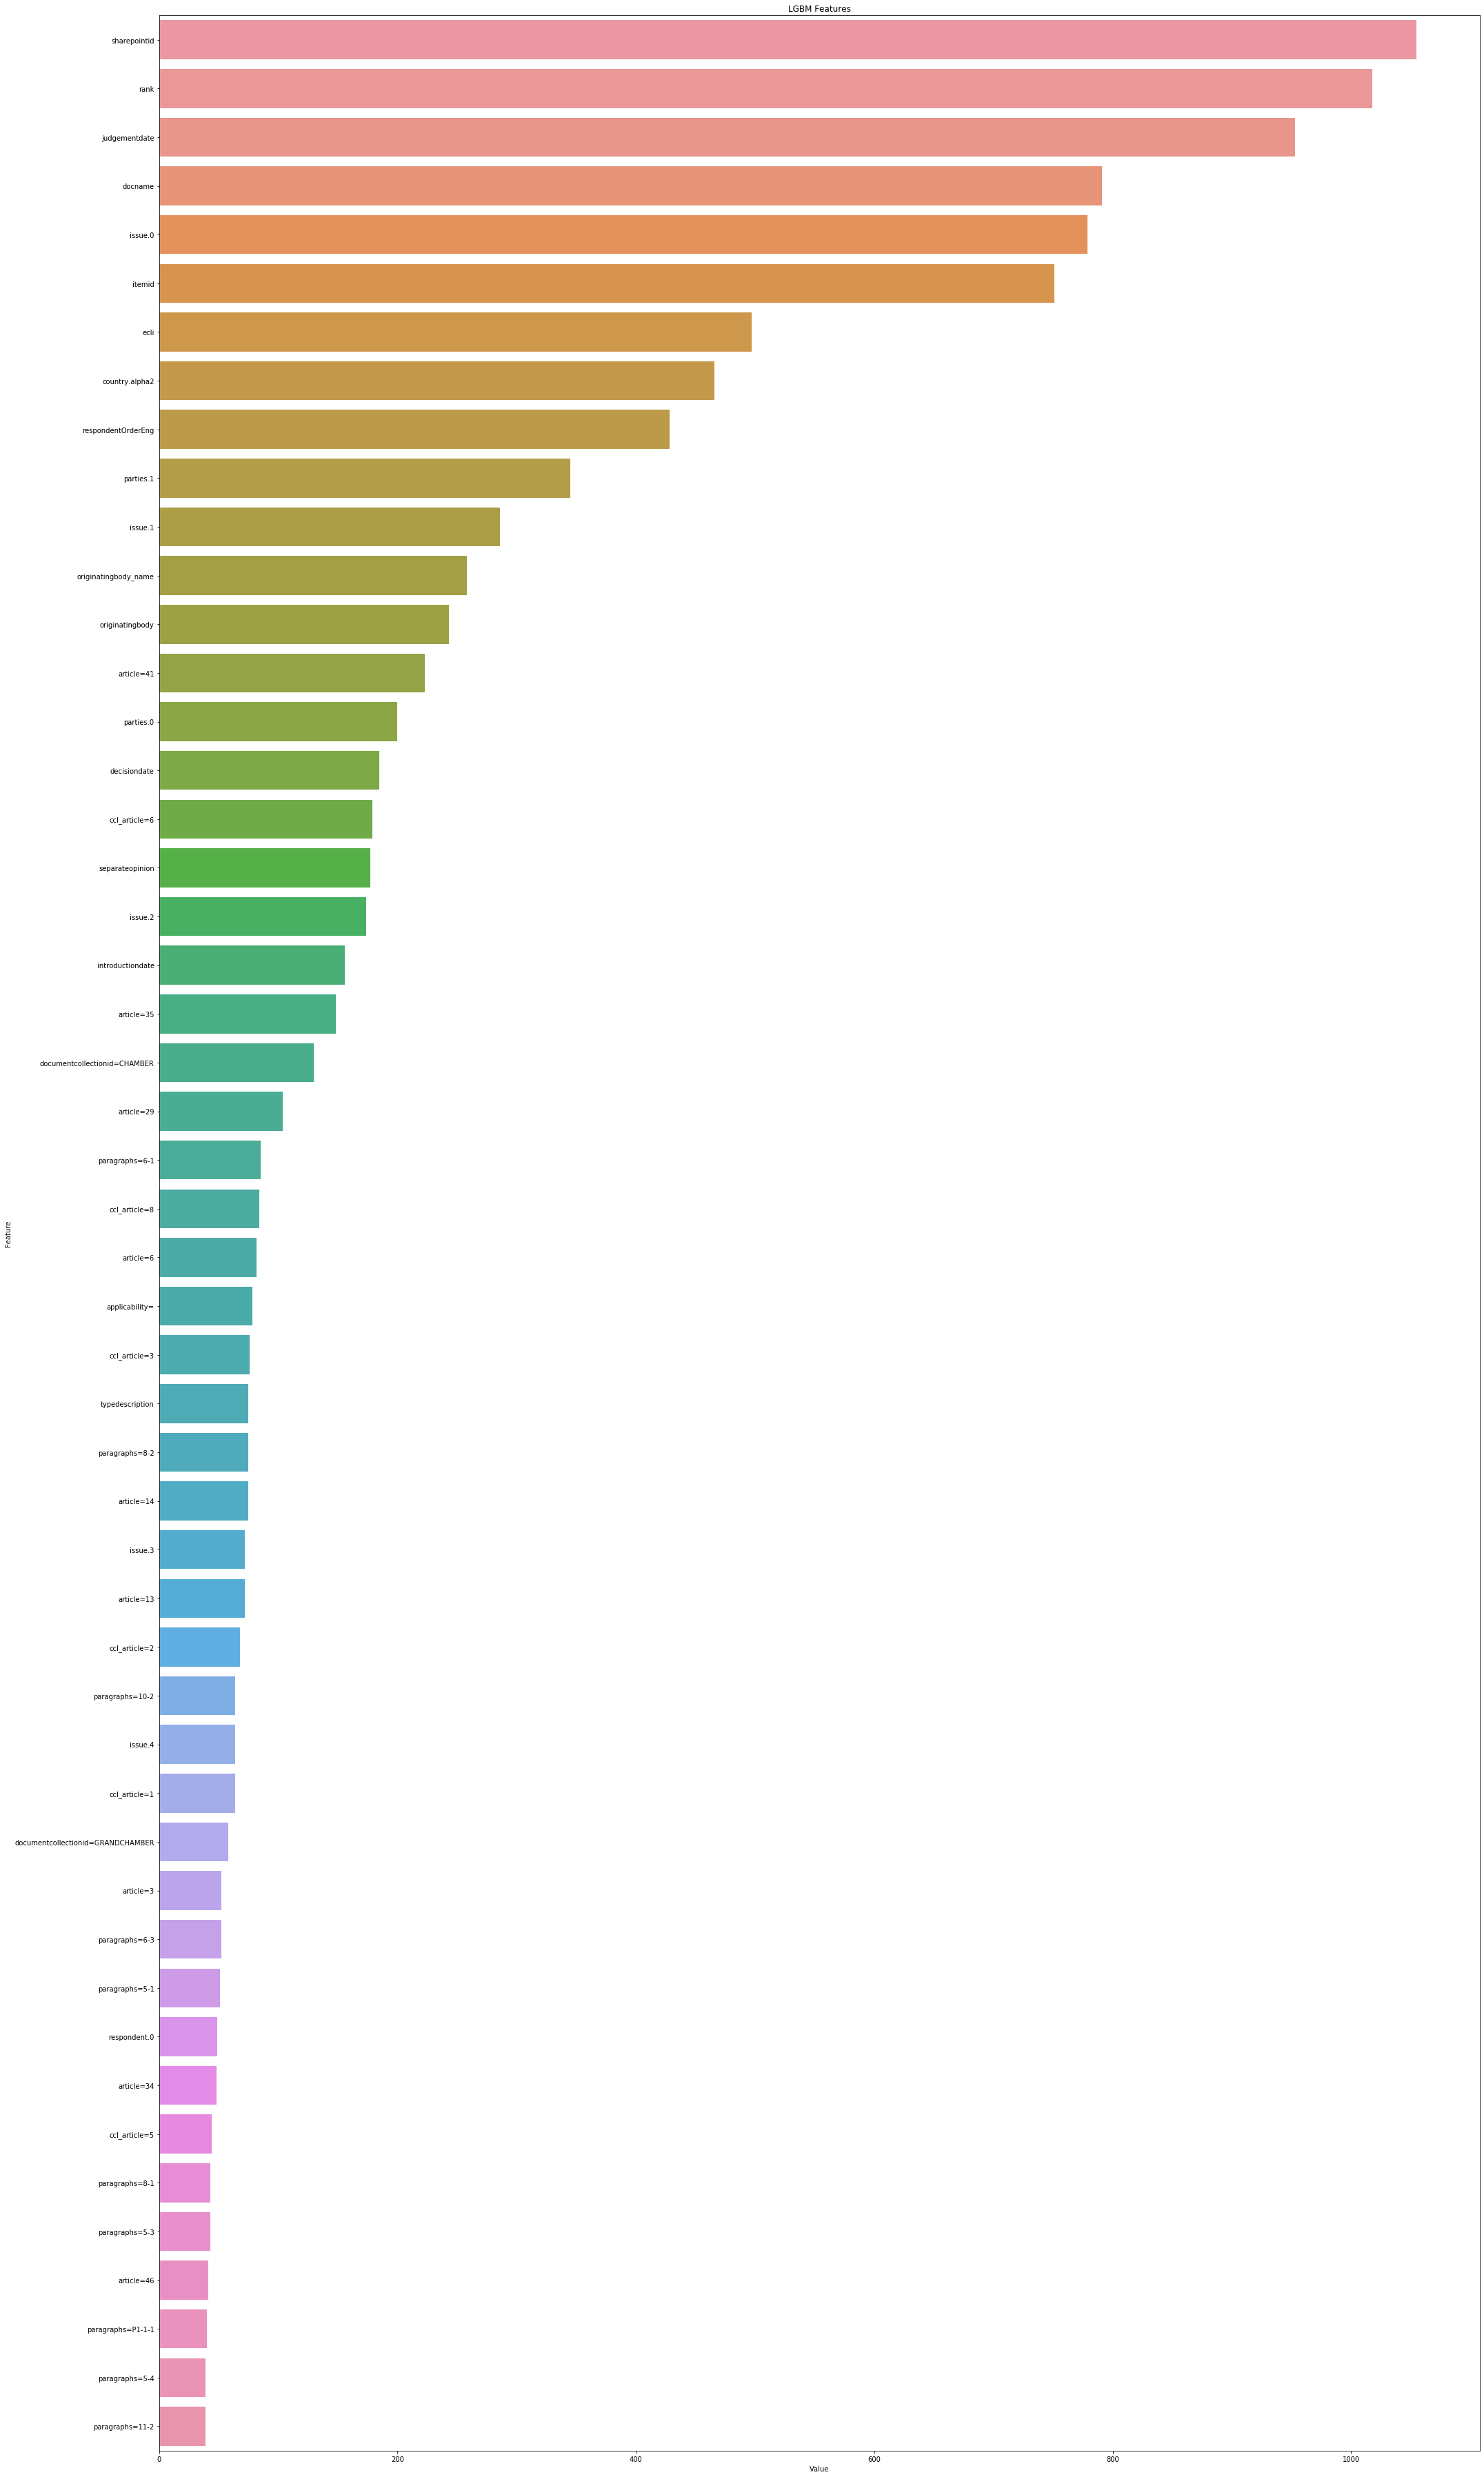

In [106]:
plt.figure(figsize= (30, 50))
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:50], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [96]:
x_train = newtrain.drop('importance', axis = 1)
y_train = newtrain['importance']
x_test = newtest

In [97]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'appno': test.appno, 'importance': y_pred})
solution.to_csv('LGBM.csv', index = False)